In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
def plotter(x_data, y_data, title):
    fig = plt.figure(figsize=[10,10])
 
    plt.plot(x_data,y_data,'b--')
    plt.xlabel('X-axis',fontsize=14)
    plt.ylabel('Y-axis',fontsize=14)
    plt.ylim(-18,18)
    plt.xlim(-18,18)
    plt.axhline(y=0, color ="k")
    plt.axvline(x=0, color ="k")
    plt.grid(True)
    saveFile = title + '.svg'
    plt.savefig(saveFile)
    plt.show()  
    

In [3]:
def rotateCoordinates(x_data, y_data, rot_angle):
    x_ = x_data*math.cos(rot_angle) - y_data*math.sin(rot_angle)
    y_ = x_data*math.sin(rot_angle) + y_data*math.cos(rot_angle)
    return x_,y_

In [4]:
def get_n_samples(x_data, y_data, n):
    indexes = np.round(np.linspace(0,99, n)).astype('int')
    return x_data[indexes], y_data[indexes]

#returns a  single random index from an array
def get_random_index(array_size):
        index = np.random.choice(array_size, 1)
        return index[0]
        #return 5
    
def build_dataset(x_,y_, shape):
        data = []
        row = {}
        for i in range(len(x_)):
            row['x' + str(i+1)] = x_[i]
            row['y' + str(i+1)] = y_[i]
        row['shape'] = shape  
        data.append(row)  
        return data

# Parabola

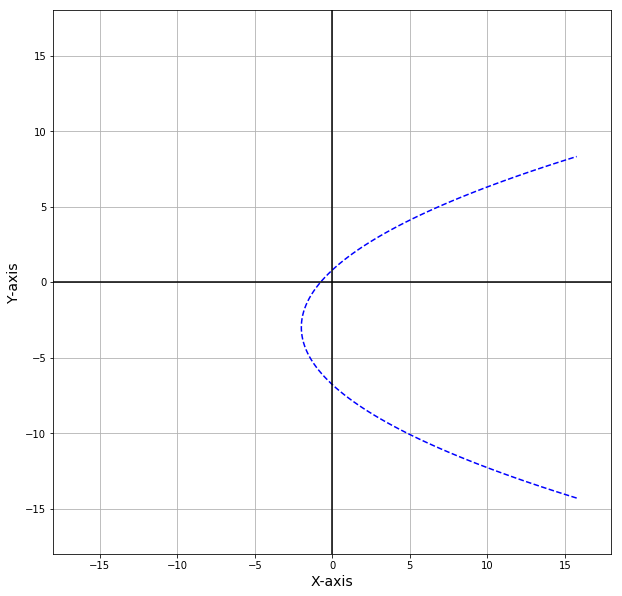

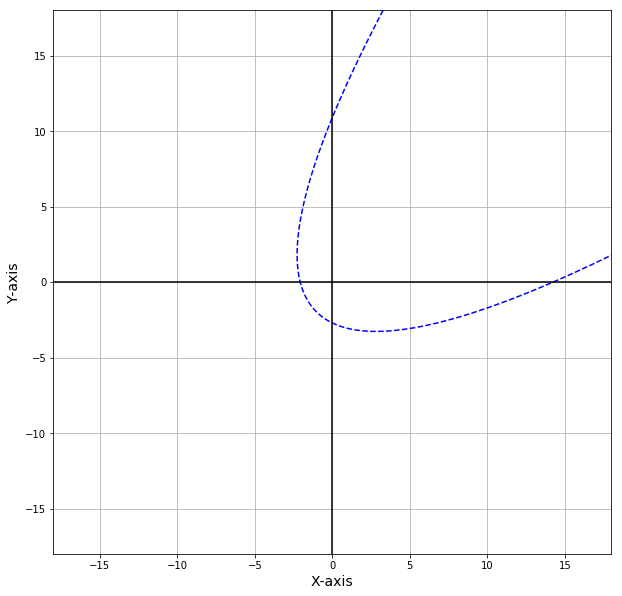

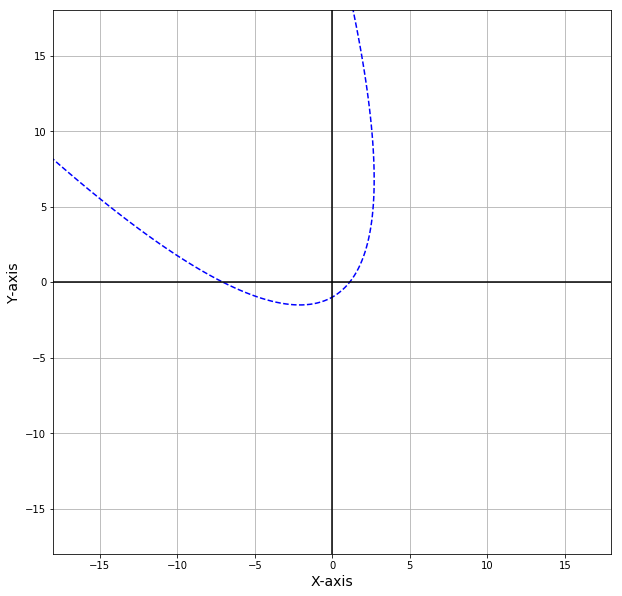

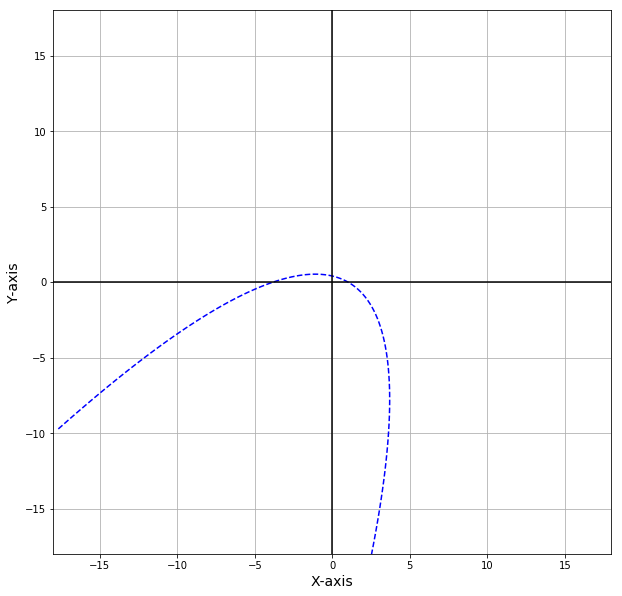

In [5]:
def createParabola(focal_length, centre, rotation):
    t = np.linspace(-math.pi, math.pi,100)
    x_parabola = focal_length * t**2
    y_parabola = 2 * focal_length * t
    if rotation is not None:
        x_parabola, y_parabola = rotateCoordinates(x_parabola, y_parabola, rotation) 
    x_parabola = x_parabola + centre[0]
    y_parabola = y_parabola + centre[1]
    return x_parabola, y_parabola
angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]
j=0
for i in angle:
    j=j+1
    x_parabola, y_parabola = createParabola(focal_length=1.8, centre=[-3+j,-4+j], rotation=i)
    temp = 'Parabola '+str(j)
    fig1 = plotter(x_parabola, y_parabola, temp)

# Circle

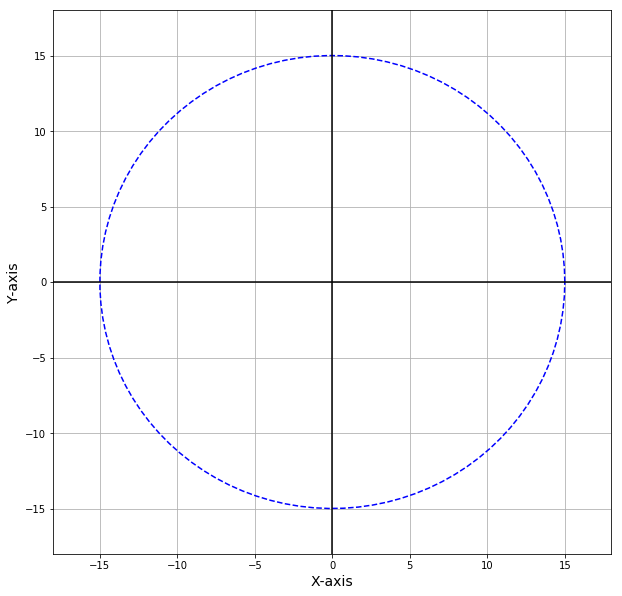

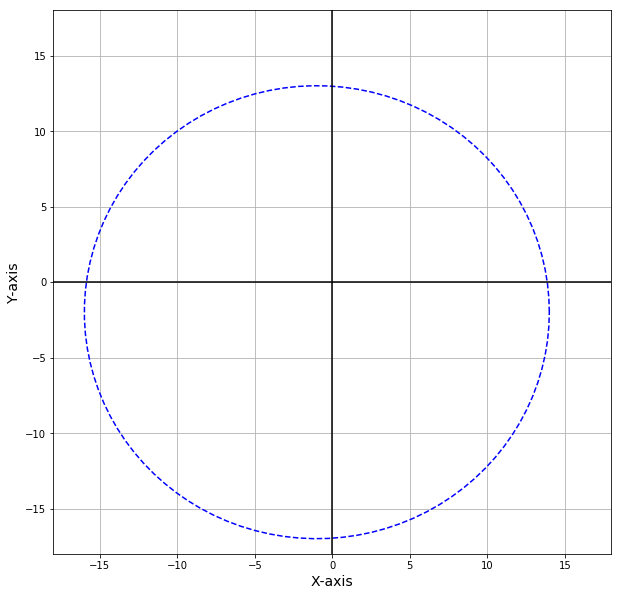

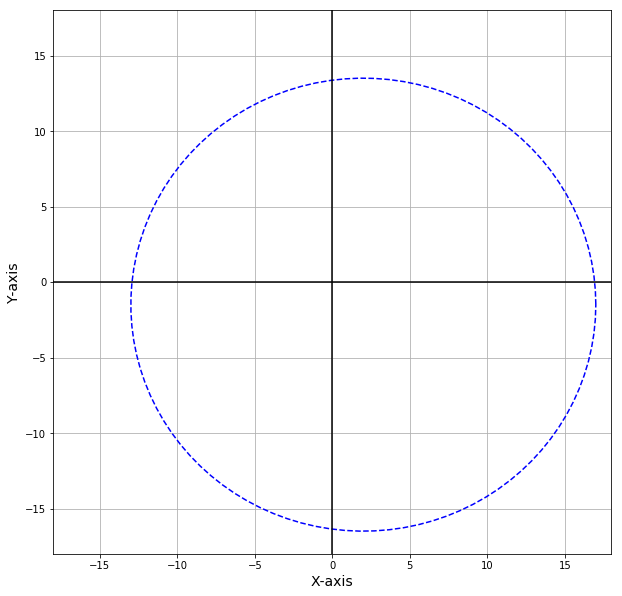

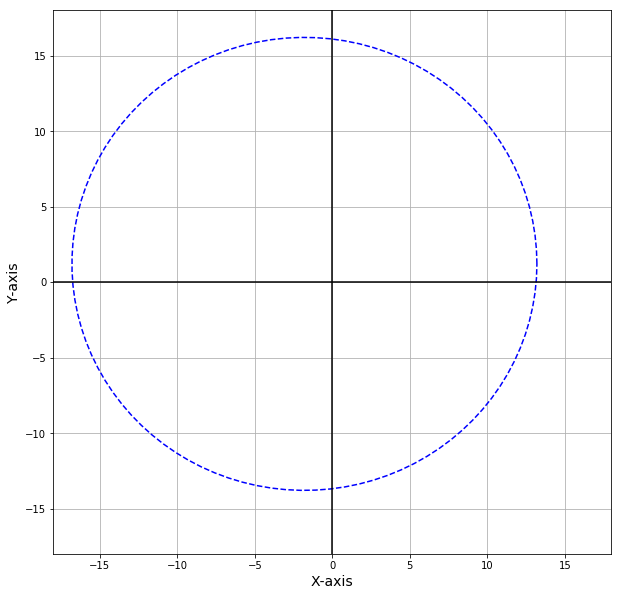

In [6]:
def createCircle(radius, centre):
    theta = np.linspace(0, 2*math.pi,100)
    x_circle = radius * np.cos(theta) + centre[0]
    y_circle = radius * np.sin(theta) + centre[1]
    return x_circle, y_circle
centre = [[0,0],[-1,-2],[2,-1.5],[-1.8,1.2]]
for i in centre:
    x_circle, y_circle = createCircle(centre=i,radius=15)
    plotter(x_circle,y_circle, 'Circle')

# Ellipse

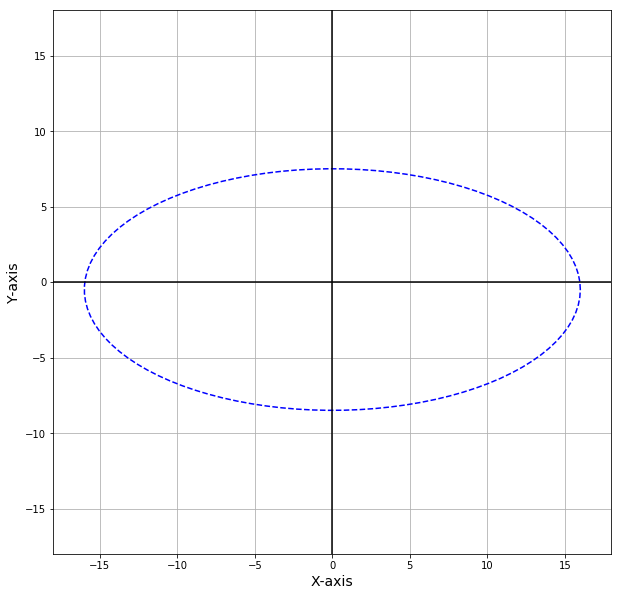

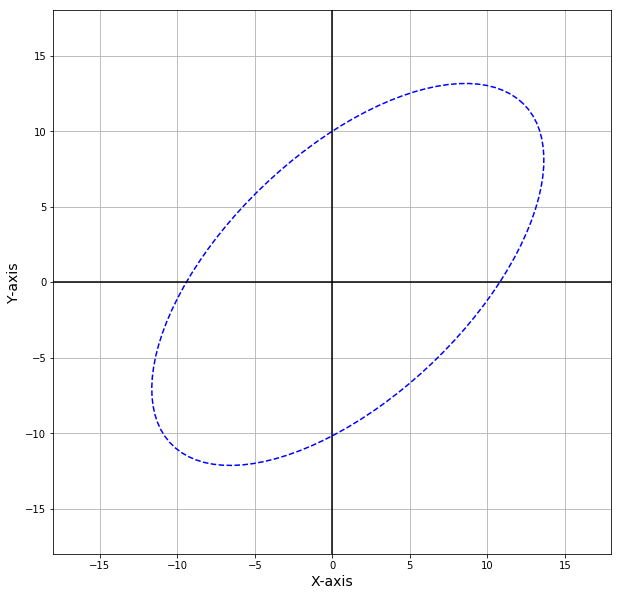

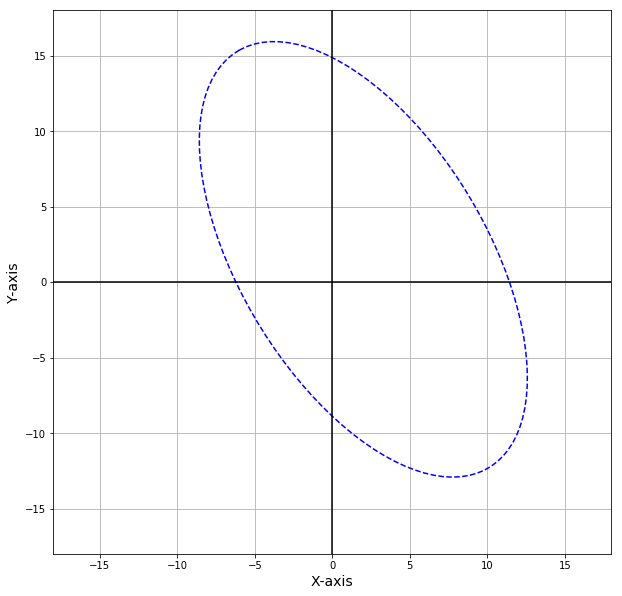

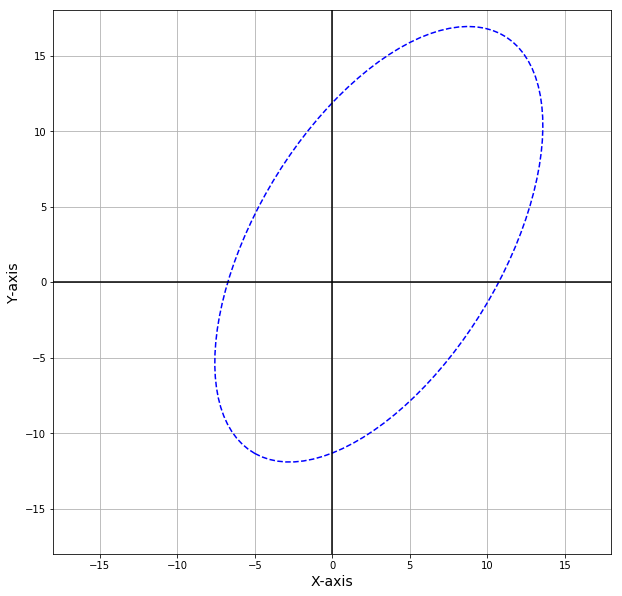

In [7]:
def createEllipse(major_axis, minor_axis, centre, rotation):
    theta = np.linspace(0, 2*math.pi,100)
    x_ellipse = major_axis * np.cos(theta) 
    y_ellipse = minor_axis * np.sin(theta) 
    if rotation is not None:
        x_ellipse, y_ellipse = rotateCoordinates(x_ellipse,y_ellipse, rotation)
    x_ellipse = x_ellipse + centre[0]
    y_ellipse = y_ellipse + centre[1]
    return x_ellipse, y_ellipse

angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]
j=0
for i in angle:
    j=j+1
    x_ellipse, y_ellipse = createEllipse(major_axis=16, minor_axis=8, centre=[-1+j, -1.5+j], rotation=i)
    temp = 'Ellipse' +' '+ str(j)
    plotter(x_ellipse,y_ellipse, temp)
    

# Hyperbola

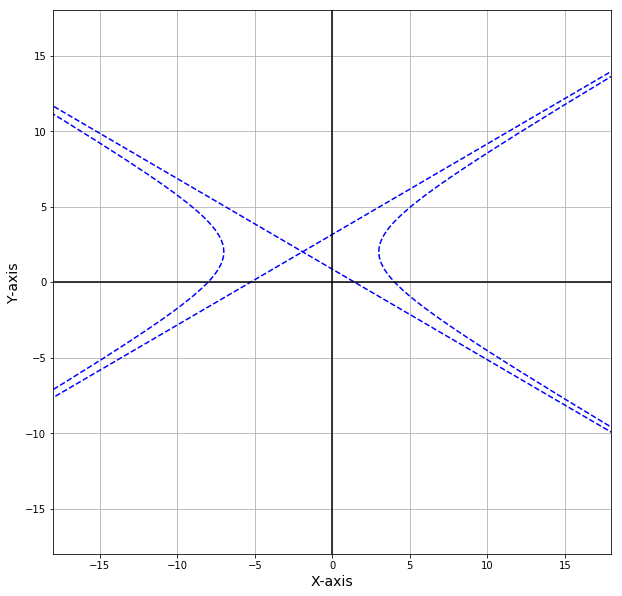

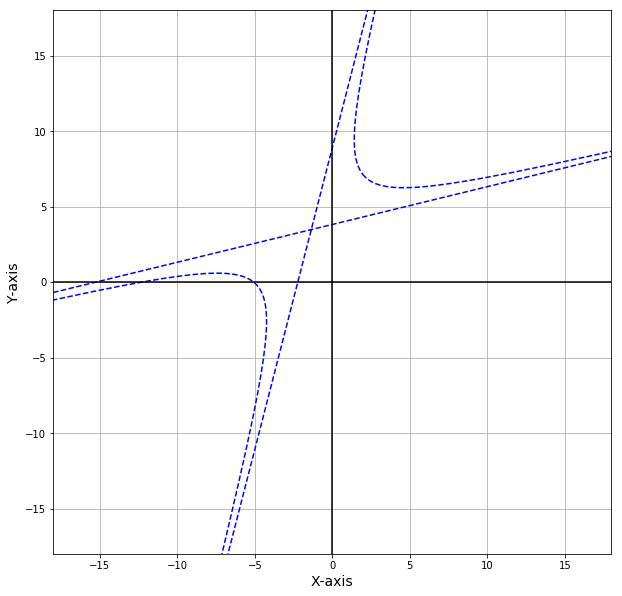

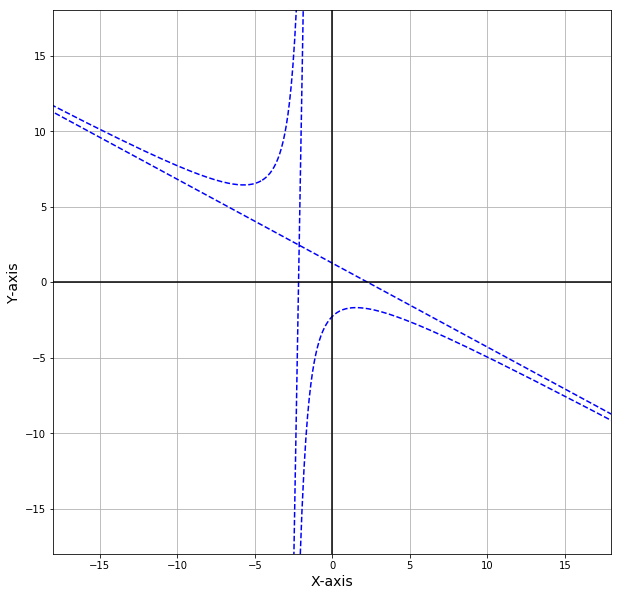

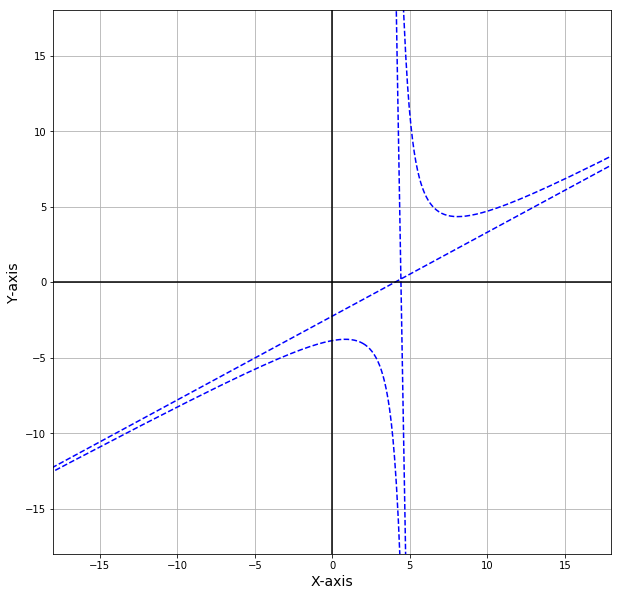

In [8]:
def createHyperbola(major_axis, conjugate_axis, centre, rotation):
    theta = np.linspace(0, 2*math.pi,100)
    x_hyperbola = major_axis * 1/np.cos(theta) + centre[0]
    y_hyperbola = conjugate_axis * np.tan(theta) + centre[1]
    if rotation is not None:
        x_hyperbola, y_hyperbola = rotateCoordinates(x_hyperbola, y_hyperbola, rotation)
    x_hyperbola = x_hyperbola + centre[0]
    y_hyperbola = y_hyperbola + centre[1]
    return x_hyperbola, y_hyperbola

j = 0
angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]
for i in angle:
    j=j+1;
    x_hyperbola, y_hyperbola = createHyperbola(major_axis=5, conjugate_axis=3, centre=[-2+j,0+j],rotation=i)
    temp = 'Hyperbola' +' '+ str(j)
    plotter(x_hyperbola,y_hyperbola, temp)

# Sampling

In [9]:
sample_count = 6

In [10]:
#circle
x,y = createCircle(radius = 1, centre= [10,10])
get_n_samples(x,y, sample_count)

(array([11.        , 10.29692038,  9.17632342,  9.17632342, 10.29692038,
        11.        ]),
 array([10.        , 10.95490224, 10.56705986,  9.43294014,  9.04509776,
        10.        ]))

In [11]:
# Parabola
x,y = createParabola(focal_length= 1, centre= [10,10],rotation= math.pi/5)
get_n_samples(x,y, sample_count)

(array([21.67784135, 15.03687705, 11.00288843,  9.58531046, 10.6349244 ,
        14.29151403]),
 array([10.71800422,  9.03101847,  9.23811141, 11.1892401 , 15.0897865 ,
        20.88441161]))

In [12]:
# Hyperbola
x,y = createHyperbola(major_axis= 2, conjugate_axis = 1, centre= [10,10],rotation= math.pi/5)
get_n_samples(x,y, sample_count)

(array([13.83035141, 15.7713744 , 10.65257347,  9.84325236, 19.55203414,
        13.83035141]),
 array([25.14359297, 30.52904962, 21.98383157, 23.09776653, 25.32541791,
        25.14359297]))

In [13]:
# Ellipse
x,y = createEllipse(major_axis= 2, minor_axis= 1, centre= [10,10],rotation= math.pi/5)
get_n_samples(x,y, sample_count)

(array([11.61803399,  9.9191498 ,  8.33395387,  9.00057272, 11.04170471,
        11.61803399]),
 array([11.1755705 , 11.12158298,  9.49047117,  8.57294904,  9.57651869,
        11.1755705 ]))

In [14]:
# Parabola
focal_length_array = np.linspace(1, 20, 100)
centre_x_arr = np.linspace(-12, 12, 100)
centre_y_arr = np.linspace(-12, 12, 100)
rotation_array = np.linspace(2*math.pi, 100)

parabola_dataset = pd.DataFrame()

for i in range(1000):
    focal_length = focal_length_array[get_random_index(len(focal_length_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]
    x,y = createParabola(focal_length= focal_length, centre= [centre_x, centre_y],rotation= rotation)
    x_, y_ = get_n_samples(x, y, sample_count)
    data = build_dataset(x_, y_, 'parabola')
    parabola_dataset = parabola_dataset.append(data, ignore_index=True)    

In [15]:
# Ellipse
major_axis_array = np.linspace(1,20,100)
minor_axis_array = np.linspace(1,20,100)
centre_x_arr = np.linspace(-12, 12, 100)
centre_y_arr = np.linspace(-12, 12, 100)
rotation_array = np.linspace(2*math.pi, 100)

ellipse_dataset = pd.DataFrame()

for i in range(1000):
    major_axis = major_axis_array[get_random_index(len(major_axis_array))]
    minor_axis = minor_axis_array[get_random_index(len(minor_axis_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]
    x,y = createEllipse(major_axis=major_axis, minor_axis=minor_axis, centre= [centre_x,centre_y], rotation= rotation)
    x_,y_ = get_n_samples(x, y, sample_count)
    data = build_dataset(x_, y_, 'ellipse')
    ellipse_dataset = ellipse_dataset.append(data, ignore_index=True)   

In [16]:
# Hyperbola
major_axis_array = np.linspace(1,20,100)
conjugate_axis_array = np.linspace(1,20,100)
centre_x_arr = np.linspace(-12, 12, 100)
centre_y_arr = np.linspace(-12, 12, 100)
rotation_array = np.linspace(2*math.pi, 100)

hyperbola_dataset = pd.DataFrame()

for i in range(1000):
    major_axis = major_axis_array[get_random_index(len(major_axis_array))]
    conjugate_axis = conjugate_axis_array[get_random_index(len(conjugate_axis_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]
    x,y = createHyperbola(major_axis=major_axis, conjugate_axis=conjugate_axis, centre= [centre_x,centre_y], rotation= rotation)
    x_,y_ = get_n_samples(x, y, sample_count)
    data = build_dataset(x_, y_, 'hyperbola')
    hyperbola_dataset = hyperbola_dataset.append(data, ignore_index=True)   

In [17]:
# Circle
radius_array = np.linspace(1,20,100)
centre_x_arr = np.linspace(-12, 12, 100)
centre_y_arr = np.linspace(-12, 12, 100)

circle_dataset = pd.DataFrame()

for i in range(1000):
    radius = radius_array[get_random_index(len(radius_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    x,y = createCircle(radius = radius, centre= [centre_x,centre_y])
    x_,y_ = get_n_samples(x, y, sample_count)
    data = build_dataset(x_, y_, 'circle')
    circle_dataset = circle_dataset.append(data, ignore_index=True)   

In [18]:
combined_dataset = pd.concat([parabola_dataset, ellipse_dataset, hyperbola_dataset, circle_dataset])
combined_dataset.to_csv('Conic-Section_dataset.csv', index=False)